In [1]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()
from keras.models import model_from_json
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)


Using TensorFlow backend.


In [2]:
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 4000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

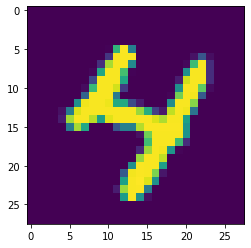

In [87]:
image = np.asarray(data[677]).squeeze()
plt.imshow(image)
plt.show()

In [4]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
for i in range(0,50):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    print(labels)

[5]
[0]
[4]
[1]
[9]
[2]
[1]
[3]
[1]
[4]
[3]
[5]
[3]
[6]
[1]
[7]
[2]
[8]
[6]
[9]
[4]
[0]
[9]
[1]
[1]
[2]
[4]
[3]
[2]
[7]
[3]
[8]
[6]
[9]
[0]
[5]
[6]
[0]
[7]
[6]
[1]
[8]
[7]
[9]
[3]
[9]
[8]
[5]
[9]
[3]


In [5]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte",
        "mnist_train.csv", 60000)
convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte",
        "mnist_test.csv", 10000)

In [81]:
train=pd.read_csv('mnist_train.csv', index_col = None, header= None)
test=pd.read_csv('mnist_test.csv',index_col = None, header= None)

x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32')
x_test = (test.iloc[:,1:].values).astype('float32')
y_test = test.iloc[:,0].values.astype('int32')

x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
num_pixels = x_train.shape[1]
num_cat = y_train.shape[1]
print(x_test.shape)
print(y_train.shape)
print(x_train)





x_train shape: (60000, 784)
60000 train samples
10000 test samples
(10000, 784)
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:


def baseline_model():
    model = Sequential()
    
    
    
    
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_cat, kernel_initializer='normal', activation='softmax'))
    #Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
# build the model


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.2850 - accuracy: 0.9194 - val_loss: 0.1407 - val_accuracy: 0.9597
Epoch 2/10
 - 9s - loss: 0.1120 - accuracy: 0.9678 - val_loss: 0.0976 - val_accuracy: 0.9698
Epoch 3/10
 - 10s - loss: 0.0723 - accuracy: 0.9794 - val_loss: 0.0833 - val_accuracy: 0.9757
Epoch 4/10
 - 16s - loss: 0.0514 - accuracy: 0.9852 - val_loss: 0.0734 - val_accuracy: 0.9769
Epoch 5/10
 - 14s - loss: 0.0370 - accuracy: 0.9893 - val_loss: 0.0625 - val_accuracy: 0.9807
Epoch 6/10
 - 11s - loss: 0.0265 - accuracy: 0.9931 - val_loss: 0.0645 - val_accuracy: 0.9800
Epoch 7/10
 - 15s - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.0626 - val_accuracy: 0.9795
Epoch 8/10
 - 12s - loss: 0.0146 - accuracy: 0.9968 - val_loss: 0.0589 - val_accuracy: 0.9811
Epoch 9/10
 - 13s - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0585 - val_accuracy: 0.9827
Epoch 10/10
 - 11s - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0613 - val_accuracy: 0.9814


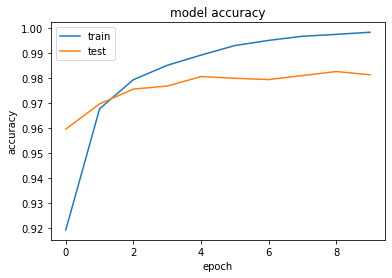

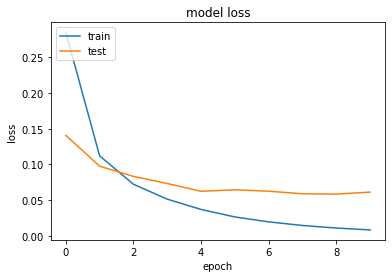

Baseline Error: 1.86%


In [85]:
model = baseline_model()
# Fit the model

history=model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test,y_test, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
